#**얘기할 내용**
[2022.08.10]

데이터 이슈 :
1.	더미 데이터를 이용한다는 거 자체가 머신러닝에 위배됨
해결책 : 
1-1.	db구축해서 그 데이터를 이용하는 방법(시스템 구축이 먼저 이루어져야함)
1-2.	통계청 데이터를 활용하는 방법 (근데 이것은 김치 및 생필품 가격 예측정도밖에 생각이 안남) -> 좋은 아이디어?

데이터 통신 이슈
2.	Spring에서 머신러닝값 불러오는 법
	개요 : spring 서버와 머신러닝 서버가 따로 존재하고, spring서버에서 머신러닝 서버를 호출하면 값을 spring서버로 반환하는 형식
	이런 방법이 있다 한들, 데이터 통신 개념이 없으면 말장 도루묵. 그래서 일단은 내가 flask나 django로 웹을 구현해서 따로 진행해봄(시간이 남으면)

알고리즘

알고리즘은 굉장히 많음. ALS알고리즘인데, 좀 더 구체적으로 봐야겠지만, 상품을 구매했다 한들 과연 이것이 생존에 필요한 물건이라 구매한건지, 내가 선호해서 구매한것인지 모르니깐, 최대한 페널티를 줘서 선호한 물품을 찾을 수 있게 해주는 알고리즘.


번외

1.	클러스터링으로 대체적으로 많이 사용하는 식품군을 선정해주고, 식품군 별로 비슷한 상품 추천 하나씩 -> 클릭횟수
2.	데이터 db구축 



----------------------------------------------------------------------------------------------------------------------

# 개발 개요
[2022.08.12]
1.	K-MEANS을 통한 고객 segmentation
2.	Segmentation별 클릭횟수를 통한 추천 알고리즘

# 사용 알고리즘
1.	K-MEANS을 통한 고객 segmentation

>>가.	K-MEANS란?

>>데이터 클러스터링(군집화)로 널리 사용되는 비지도학습 알고리즘이다.

>>나.	목적 함수

>>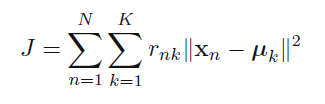
 
>>적절한 Centroid 개수를 정하고, 각 Centroid와 가깝게 위치한 데이터에 입각하여 최적의 Centroid를 업데이트해 나간다.

>>다.	목적 함수 최적화 단계

>>k-평균 알고리즘은 주어진 데이터를 k개의 클러스터로 묶는 알고리즘으로, 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 동작한다.
>>>I.	일단 K개의 임의의 중심점(centroid)을 배치하고

>>>II.	각 데이터들을 가장 가까운 중심점으로 할당한다. (일종의 군집을 형성한다.)

>>>III.	군집으로 지정된 데이터들을 기반으로 해당 군집의 중심점을 업데이트한다.

>>>IV.	2번, 3번 단계를 그래서 수렴이 될 때까지, 즉 더이상 중심점이 업데이트 되지 않을 때까지 반복한다.

2.	Segmentation별 클릭횟수를 통한 추천 알고리즘(잠재요인 헙업 필터링)

>>가.	잠재요인 협업 필터링이란?

>>사용자-아이템 클릭 행렬속에 숨어 있는 잠재 요인을 추출해 추천 예측을 하는 기법이다.

>>나.	행렬 분해
>>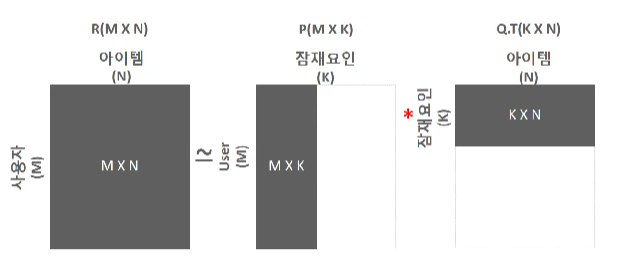

>>다.	목적 함수

>>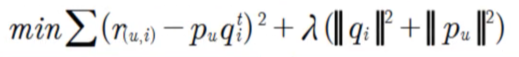
 
>>잠재요인 협업 필터링은 특이값 분해(SVD)와 비슷하지만, 관측된 선호도만 모델링에 활용하고 관측되지 않은 선호도를 예측하는 모델을 만든다. 위의 목적식을 최소화하면서 P(사용자 행렬)와 Q(아이템 행렬)의 값을 업데이트 해간다. 

#개발 순서
1.	실제 마켓컬리에서 얻을 수 있는 특성이라 가정하고, Kaggle의 Customer Personality Analysis 컴피티션 데이터를 이용하여 사전학습을 진행한다.

* 모든 특성을 사용하지 않고 몇 가지 특성만 추출한다.

2.	데이터를 기반으로 최적의 Cluster를 계산하여 K-means를 실시하여 고객 분류를 실시한다.

3.	분류된 고객내에서 클릭횟수를 이용한 잠재요인 협업 필터링 알고리즘을 이용하여 관련도 높은 상품을 나타낸다.

* 신규 고객은 클릭횟수의 데이터가 존재하지 않기 때문에 사전에 등록한 정보를 이용하여 비슷한 고객의 추천 상품을 나타나게 한다.

#향후 발전 방향 

캐글 데이터만 이용할 것이 아닌, 추후 만들어질 DB까지 이용하여 데이터 내에서 유의미함을 파악할 수 있도록 지속적으로 데이터를 분석할 것이다. 
	예를 들어, 고객이 30-40대 여성이라는 점에서 기혼자와 미혼자를 파악할 수 있다면, 기혼자에게는 생필품 및 육아상품 추천, 미혼자에게는 1인 밀키트, 운동기구 등에 가중치를 부여하는 방식으로 추천 알고리즘을 발전시킬 수 있을 것이다.
